# First group session

This sessions went through some basic Python functions, as well as some intro data [cleaning](#Cleaning), [analysis](#Analysis), [correlation](#Correlation), and [grouping](#Grouping). 

# List comprehensions


In [1]:
2**3

8

In [2]:
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [4]:
[i**3 for i in range(20) if i%3==0]

[0, 27, 216, 729, 1728, 3375, 5832]

Can make list comprehensions as difficult as we want, but usually not too good

# Dictionaries


In [5]:
my_dict = {'a':1, 'b':2}
my_dict

{'a': 1, 'b': 2}

Can also have dictionary comprehensions

In [7]:
square = {i: i**2 for i in range(10)}
square

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

The comprehensions are not necessarily "free". Indexing and looking up in dicts are more expensive than lists.

# Back to lists

In [10]:
my_list = [1, 'string', 3.4, []]

In [17]:
my_list.pop()

4

In [14]:
my_list.append(4)

[1, 'string', 3.4, 4, 4, 4]

In [18]:
my_list

[1, 'string', 3.4, 4]

In [19]:
n = [3,12,8,43,5,89]

In [20]:
n.sort()

In [21]:
n

[3, 5, 8, 12, 43, 89]

In [22]:
m = [3,12,8,43,5,89]

In [23]:
sorted(m)

[3, 5, 8, 12, 43, 89]

# Control

In [25]:
if 3%2==0:
    print('even')
else:
    print('odd')

odd


In [28]:
for element in range(1, 10):
    print(element)
    if element % 5 == 0:
        break
else:
    print('hello else')

1
2
3
4
5


# Functions

In [29]:
def my_function(foo = []):
    foo.append(1)
    print(foo)
    

In [36]:
my_function()

[1, 1, 1, 1, 1, 1, 1]


So watch out for setting defaults to lists. They will be static, meaning every time the function is run, the same list will be used. 

# Data analysis

## Overview of data

Let's see what our data set looks like.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# last line gives easier looking plots

In [47]:
data = pd.read_csv('IN-STK5000-Notebooks-2020/data/AirQualityUCI.csv.gz', sep=';', usecols=range(15)).dropna() # read only first 14 columns

In [48]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


In [44]:
!head IN-STK5000-Notebooks-2020/data/AirQualityUCI.csv.gz
# In Jupyter, you can run terminal commands by adding the ! in front
# Only problem, here we're looking at a zip .gz file, so its not actually readable

‹Ò(>_ AirQualityUCI.csv ”½Éo½“$´Gâ=ª¥KµçA¿*$j… _€E/X°cÁããˆHûøØçª?¤úuÇ¼>rŒŒüŸþÏÿç¿þþËÿõÿ×ß¿ýÇ¿üÏÿå?ýþ·ÿâÚ¿þþ_þí?þÓïý_þýßø‹ÿVþ½l¿þ¿3~ÿ?þßíWã¿ŒŸãÃö‹iüb˜?Éÿòñ?ýþËïÿ÷ßÿøï¿ßÿßy÷Ÿ]üÏÁ¹ôóí_�ÿ÷ÊÏÇâ~>�ÿù?ýç]¿TÆÿ\ÿñqü¤‡Ÿ¥�?9þxjãO¹?5×vJíSêøãø;>üúŸôë9iC�¯ã'ã×sî¿^äÅ_ª*ä…ñ§Þò‚[«6¹ðkmt¿Ç:£V� ÿÄÏoÈiü!,qü•C¤ßEÆZ~mˆ?îi|–äø±XdÒ—=¤'‘­ÔSd0‘{†ŒìåOþµX´ÊàÆâüøIêX®çN�?ÖÇ_€ÈvndˆK$v±×_l¿4¶i|Ñ¯áÛcýuHïq¬¼/y�ò’äù%Ï¹—¼–cY8Ë2T°·ã?µBnüÕÈOŽ¿\þ4È+cysqã+)-þÊøvJËCJ™ÒÆŸBÖV;“MÚÜ@Çë×Ç÷�ÿƒ<×il]®ý‡+†ÐLÞøZ^›rm\òp‹±ÝC.þJñ¿ÿ!`Ùuœˆ~bþeç!ÿ v0ûzÊL&SËùñ7ÆõÀ.…:nÕxQ¾ýbÒi%¬Úýñ˜!0•|
Ìk‘cßÝxoãþ�¿‘Ç›ÁUéC\h8¬ðK¸Ž¸„ãD¸¾8þø!®¼Äe	ßŸÇY`Y7¨áfûñâpÏÇÊrÿ"äåë„ëº1|fã@ú8ãq¾ãþ÷¦«Üð„ÆS´3~ntº÷¯=ª×¢¤_ÃCæa$Ý"¨�­/„l¿\‡ú€@wr=äñäÚXØø¦Î›‚‹Tñ�‡<.´Ãfâ›‹ÓK÷‡Hÿ¼’Š‹ñ$Ê8âªÆ¡ðã‡ŠlÅÙ›Ö˜óy±ýz&  ÆzÒ¸/ã³ëx%}üR‹‚º‰ãç¥z;”*ýoyoM3¶l\èüO«ÿ‹ã{!8�ÿ_ÆcCŠ=ãž¯~ÔÌØªÐ†¼ñÍøàÒ¡ ´‚ËP8µ÷qhxÚüàåsLëP ¤ðE…*™ú
—'âßÂ�Ä¹¸Íó&¶qµO™ùuÐã5W,clôt´k4Oø·†x
ÙùÕ­Öóæø²„�;†¿Òñ¡ÊJŠ;wl'îÕøzÏ·×òØ›C`}}5¾/›Š×n

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [51]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


In [52]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [53]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Cleaning

Notice how some of the mins are -200. This could seem a bit peculiar since we wouldn't have negative values when measuring particles in the air. Let's try plotting it to see if we can get a better pic of what's happening here.

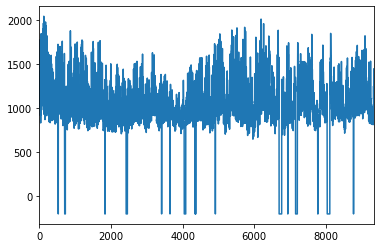

In [54]:
data['PT08.S1(CO)'].plot()

Looks like the missing value was given some unlikely value, so we know that it'd be off. 

In [55]:
data['T']

0       13,6
1       13,3
2       11,9
3       11,0
4       11,2
5       11,2
6       11,3
7       10,7
8       10,7
9       10,3
10      10,1
11      11,0
12      10,5
13      10,2
14      10,8
15      10,5
16      10,8
17      10,5
18       9,5
19       8,3
20       8,0
21       8,3
22       9,7
23       9,8
24      10,3
25       9,7
26       9,6
27       9,1
28       8,2
29       8,2
        ... 
9327    17,8
9328    21,1
9329    24,0
9330    26,5
9331    28,7
9332    28,5
9333    30,0
9334    29,4
9335    28,9
9336    22,8
9337    19,9
9338    17,5
9339    16,4
9340    15,5
9341    14,3
9342    14,2
9343    13,8
9344    12,1
9345    11,3
9346    11,8
9347    10,4
9348     9,5
9349     9,7
9350    13,5
9351    18,2
9352    21,9
9353    24,3
9354    26,9
9355    28,3
9356    28,5
Name: T, Length: 9357, dtype: object

As we can see here, some of the columns like 'T' use commas for decimals, while others use periods. We can fix this with apply(), but beware, this function is notoriously slow. We'll use a lambda function inside apply. Here's a quick example of what lambda does:

In [56]:
my_fn = (lambda x: x+2)

In [57]:
my_fn(4)

6

### Replacing characters
Now for our changing of ',' with '.':

In [61]:
data['T'] = data['T'].apply(lambda x: float(x.replace(',','.'))) 

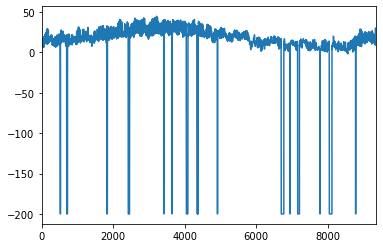

In [62]:
data['T'].plot()

### Removing unwanted values
And now we can remove the "empty" -200 values. We'll replace it with NaN.

In [64]:
data['T'] = data['T'].replace(-200, float('nan'))

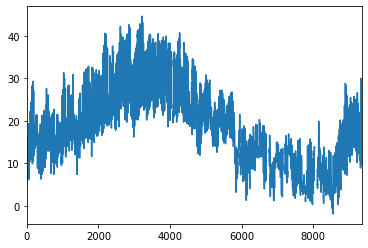

In [65]:
data['T'].plot()

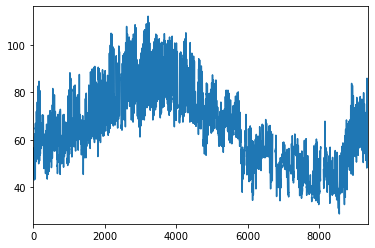

In [66]:
# Maybe we want to convert to farenheit
(data['T'] * 9/5 + 32).plot()

Brilliant! Now let's make this a function, so that we can apply this to all other columns with similar defects

In [67]:
def fixup(col):
    return (col.apply(lambda x: float(x.replace(',','.'))) 
            .replace(-200, float('nan')))

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                8991 non-null float64
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(9), object(6)
memory usage: 1.1+ MB


Looks like CO(GT) also needs to be fixed. Let's try out our `fixup()` function.

In [69]:
data['CO(GT)'] = fixup(data['CO(GT)'])

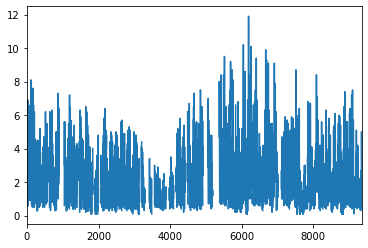

In [70]:
data['CO(GT)'].plot()

Nice! Repeat this for the remaining columns which are objects, but should be float64.

In [71]:
# Repeat fixup() for C6H6(GT), RH, AH

### Converting to datetimes

Now, we'd like to convert the date and time columns to a datetime, which we know is just a string. Let's try combinding the two.

In [102]:
time_df = data.set_index(pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S'))

In [77]:
time_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004-03-10 18:00:00,10/03/2004,18.00.00,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,"48,9","0,7578"
2004-03-10 19:00:00,10/03/2004,19.00.00,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,"47,7","0,7255"
2004-03-10 20:00:00,10/03/2004,20.00.00,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,"54,0","0,7502"
2004-03-10 21:00:00,10/03/2004,21.00.00,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,"60,0","0,7867"
2004-03-10 22:00:00,10/03/2004,22.00.00,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,"59,6","0,7888"
2004-03-10 23:00:00,10/03/2004,23.00.00,1.2,1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,"59,2","0,7848"
2004-03-11 00:00:00,11/03/2004,00.00.00,1.2,1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,"56,8","0,7603"
2004-03-11 01:00:00,11/03/2004,01.00.00,1.0,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,"60,0","0,7702"
2004-03-11 02:00:00,11/03/2004,02.00.00,0.9,1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,"59,7","0,7648"
2004-03-11 03:00:00,11/03/2004,03.00.00,0.6,1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,"60,2","0,7517"


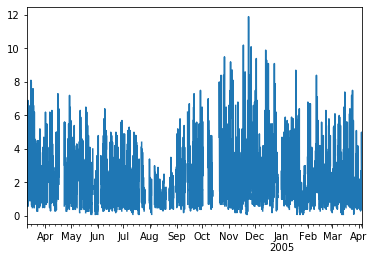

In [78]:
time_df['CO(GT)'].plot()

# Analysis

## Filtering / slicing

Now, let's do some slicing, where we only choose those values from 2005.

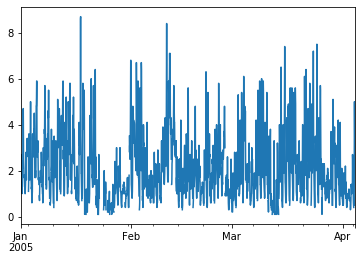

In [79]:
time_df['CO(GT)']['2005'].plot()

Some more attribute slicing.

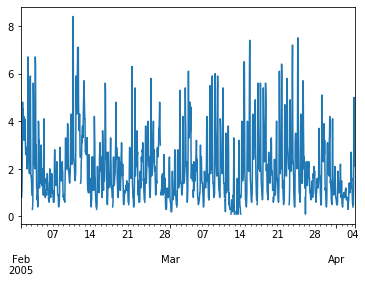

In [80]:
time_df['CO(GT)']['2005-02':'2005-04'].plot()  # February 2005 to April 2005 

## Fix noisy data

As we can see, this data is pretty noisy, so we want to zoom with this?

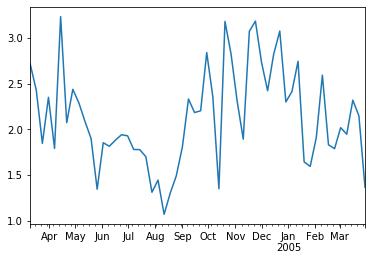

In [88]:
time_df['CO(GT)'].resample('7d').mean().plot() # give you 7 day average, or average every 7 days w.r.t. timestamps (on datetimes)
plt.show()
# time_df['CO(GT)'].rolling(14).mean().plot()  # give you rolling average given index
# plt.show()

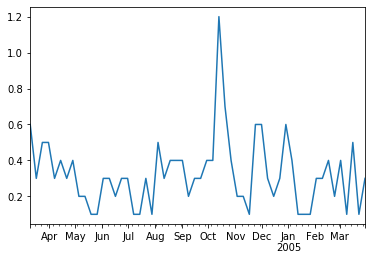

In [91]:
#  Minimum value seen in a 7 day period
time_df['CO(GT)'].resample('7d').min().plot() # give you 7 day average, or average every 7 days w.r.t. timestamps (on datetimes)
plt.show()

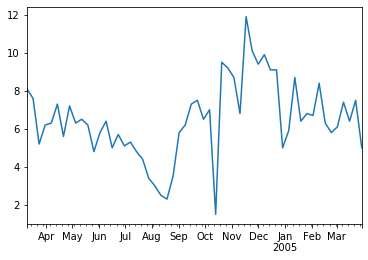

In [92]:
#  Maxmum value seen in a 7 day period
time_df['CO(GT)'].resample('7d').max().plot() # give you 7 day average, or average every 7 days w.r.t. timestamps (on datetimes)
plt.show()

## Visualization
Let's look at other plots. 

In [95]:
# time_df['CO(GT)'].plot.bar() # this guy is too big, will take forever to run
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7674 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                8991 non-null float64
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(10), object(5)
memory usage: 1.5+ MB


In [105]:
time_df['RH'] = fixup(time_df['RH'])

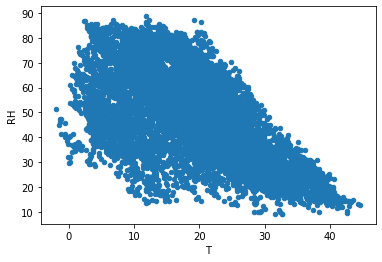

In [98]:
time_df.plot.scatter('T', 'RH')

Here we see there is a cut off with temperature. With very high heat capacity (the relative humidity is super high) there is a general lower temperature.

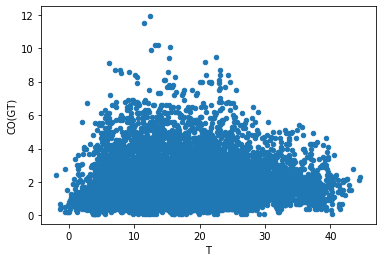

In [100]:
time_df.plot.scatter('T', 'CO(GT)')

With data, it can sometimes be dangerous to just haphazardly compare two parts of your data. You should always think about, what should you expect when comparing these two data. So for example, this temperature vs carbon monoxide might just be a correlation between the seasons. 

# Correlation

We have two variables X & Y

$$ \frac{E[(X - E(X))(Y-E(Y))]}{N} $$

If both X and Y are both above their exp. value, more often than not, we'll get something positive here.

So this measures how X and Y vary together. 

In data analysis, you're interested in which quantities fluctuate together. 

In [106]:
time_df[['T', 'CO(GT)', 'RH']].corr()

,T,CO(GT),RH
T,1.000000,0.022109,-0.578621
CO(GT),0.022109,1.000000,0.048890
RH,-0.578621,0.048890,1.000000


# Grouping

In [107]:
time_df.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', length=9357, freq=None)

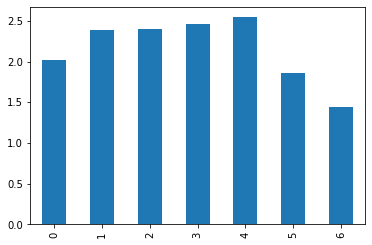

In [113]:
time_df.groupby(time_df.index.weekday)['CO(GT)'].mean().plot.bar()

What do we see here? The averages based on the day of the week. So, throughout the week, we see a rise in CO levels in cities as car travel increases. Then a slight dip in the weekends.

We can now look at two groups simultaneously. We'll see days of week and months.

In [124]:
md_data = time_df.groupby([time_df.index.weekday, time_df.index.month])['CO(GT)'].mean()

In [125]:
md_data = md_data.reset_index()

In [126]:
# Renaming the columns to to have proper names for the columns
md_data.columns = ['weekday', 'month', 'CO']

In [129]:
md_data

,weekday,month,CO
0,0,1,2.275455
1,0,2,1.525263
2,0,3,2.150303
3,0,4,1.637333
4,0,5,1.767961
5,0,6,1.839362
6,0,7,1.786667
7,0,8,1.297619
8,0,9,2.226506
9,0,10,3.044681


## Pivoting (transforming?)

In [131]:
md_data.pivot_table(index= 'month', columns= 'weekday', values = 'CO')

weekday,0,1,2,3,4,5,6
month,,,,,,,
1,2.275455,2.383721,2.146914,2.082796,2.580000,1.956034,1.562105
2,1.525263,1.944211,2.317895,2.422340,2.586316,2.253684,1.622340
3,2.150303,2.214439,2.360104,2.235979,2.488415,1.855975,1.616352
4,1.637333,2.170423,2.201695,3.003529,2.677206,1.583333,1.195714
5,1.767961,2.340741,2.331579,2.275362,2.222078,1.673404,1.241304
6,1.839362,2.269565,2.346875,2.207143,2.181013,1.375789,1.125263
7,1.786667,2.431250,2.501852,2.219565,2.003158,1.380870,0.890426
8,1.297619,1.478571,1.423214,1.259701,1.540299,1.030645,0.942254
9,2.226506,2.537500,2.737647,2.348936,2.077215,1.447222,1.605634


Trying to achieve the same thing with for loops with slow and hard to read. Everyone understands what pivot means (okay.) so much better to use this. 

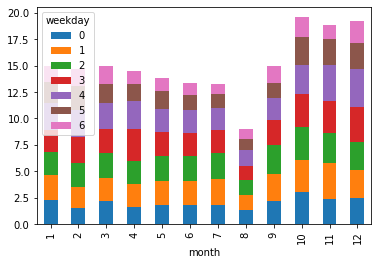

In [133]:
md_data.pivot_table(index= 'month', columns= 'weekday', values = 'CO').plot.bar(stacked=True)

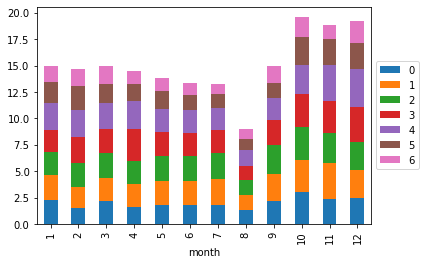

In [134]:
md_data.pivot_table(index= 'month', columns= 'weekday', values = 'CO').plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

The dip in august is because that's when all Italians are on vacation. And the legend moving is very useful. 

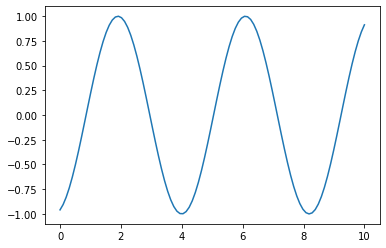

In [16]:
from numpy import linspace
import matplotlib.pyplot as plt


a = linspace(0, 10, 100)
b = linspace(5, 20, 100)


plt.plot(a,np.sin(b))

Here were looking